In [1]:
# 도움말 보기
# 함수 괄호 앞에서 Shift + Tap
# help(해당함수 또는 import한 기능)

# 워킹디렉토리 지정
import os
os.chdir("D:/python 실습자료")

In [2]:
# 230421 수업

In [3]:
import pandas as pd

In [40]:
import seaborn as sns
iris = sns.load_dataset('iris')

In [41]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [43]:
y = iris['species']
X = iris.drop('species',axis=1)

from sklearn.preprocessing import LabelEncoder
classle = LabelEncoder() 
y = classle.fit_transform(y) # 문자형 범주 변수를 수치화

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

from sklearn.preprocessing import StandardScaler # 자료 표준화는 상황에 따라 취사 선택
sc = StandardScaler() 
sc.fit(X_train) # 표준화 식 완성 => 평균, 표준편차 계산
X_train_std = sc.transform(X_train) # 자료 표준화
X_test_std = sc.transform(X_test)

In [44]:
# K-Nearest-Neighbors (표준화 X)
from sklearn.neighbors import KNeighborsClassifier

In [45]:
knn = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)

In [46]:
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

In [47]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_train, y_train_pred)

array([[35,  0,  0],
       [ 0, 32,  3],
       [ 0,  1, 34]], dtype=int64)

In [48]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.97      0.91      0.94        35
           2       0.92      0.97      0.94        35

    accuracy                           0.96       105
   macro avg       0.96      0.96      0.96       105
weighted avg       0.96      0.96      0.96       105



In [49]:
confusion_matrix(y_test, y_test_pred)

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  0, 15]], dtype=int64)

In [50]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        15

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [51]:
from sklearn.metrics import recall_score, precision_score, f1_score
recall_score(y_test, y_test_pred, average=None) # 예측하고자 하는 결과가 3개 이상인 경우 average=None 지정

array([1., 1., 1.])

In [52]:
precision_score(y_test, y_test_pred, average=None)

array([1., 1., 1.])

In [53]:
f1_score(y_test, y_test_pred, average=None)

array([1., 1., 1.])

In [54]:
# K-Nearest-Neighbors (표준화 O)
from sklearn.neighbors import KNeighborsClassifier

In [55]:
knn = KNeighborsClassifier(n_neighbors=5).fit(X_train_std, y_train)

In [56]:
y_train_pred = knn.predict(X_train_std)
y_test_pred = knn.predict(X_test_std)

In [57]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_train, y_train_pred)

array([[35,  0,  0],
       [ 0, 34,  1],
       [ 0,  3, 32]], dtype=int64)

In [58]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.92      0.97      0.94        35
           2       0.97      0.91      0.94        35

    accuracy                           0.96       105
   macro avg       0.96      0.96      0.96       105
weighted avg       0.96      0.96      0.96       105



In [59]:
confusion_matrix(y_test, y_test_pred)

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 14]], dtype=int64)

In [60]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [61]:
from sklearn.metrics import recall_score, precision_score, f1_score
recall_score(y_test, y_test_pred, average=None) # 예측하고자 하는 결과가 3개 이상인 경우 average=None 지정

array([1.        , 1.        , 0.93333333])

In [62]:
precision_score(y_test, y_test_pred, average=None)

array([1.    , 0.9375, 1.    ])

In [63]:
f1_score(y_test, y_test_pred, average=None)

array([1.        , 0.96774194, 0.96551724])

In [28]:
# example
import pandas as pd
# 1) 허리 둘레.csv 불러오기
df = pd.read_csv('허리둘레.csv', encoding='cp949')
# 2) 허리둘레(윗허리) : 0은 결측자료
import numpy as np
df['허리둘레'] = df['허리둘레(윗허리)'].replace(0, np.nan)
df = df.dropna(subset=['허리둘레'], axis=0)
# 3) BMI 계산: 몸무게/(키(m)**2)
df['BMI'] = df['몸무게']/((df['키']/100)**2)

# 4) BMI등급화: <18.5 저체중, 18.5<= < 23: 정상, 23<=비만
df['BMI_c'] = pd.cut(df['BMI'], bins=[0,18.5,23,100],
       labels=['저체중', '정상', '비만'], right=False)

In [29]:
df

,성별,측정일자,키,몸무게,머리둘레,희망치수머리,목둘레,화장,젖가슴둘레,배꼽수준허리둘레,...,윗가슴둘레(겨드랑이),허리둘레(윗허리),어깨가쪽사이길이,팔길이,등길이,다리가쪽길이,총장,허리둘레,BMI,BMI_c
0,남,2021-06-16,169.2,55.6,54.1,0,34.7,60.3,86.4,67.5,...,86.8,70.8,40.5,39.4,32.5,99.5,142.0,70.8,19.421111,정상
1,남,2021-06-16,182.7,66.6,55.8,0,36.3,87.5,90.6,75.7,...,95.9,75.2,54.9,61.9,37.5,106.0,153.5,75.2,19.952491,정상
2,남,2021-06-16,177.7,79.7,58.5,0,38.3,77.0,98.6,85.2,...,104.7,85.8,57.4,50.6,38.0,102.0,150.0,85.8,25.239658,비만
3,남,2021-06-16,171.3,69.4,56.3,0,37.0,77.0,93.9,78.5,...,94.7,80.5,54.2,50.9,35.5,99.0,144.5,80.5,23.650741,비만
4,남,2021-06-16,173.8,63.9,55.5,0,36.1,62.3,89.9,74.2,...,89.6,75.0,47.5,39.6,28.5,108.0,146.5,75.0,21.154429,정상
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647,남,2021-03-04,182.5,77.0,60.6,0,37.7,87.6,96.6,80.8,...,109.5,82.1,58.2,61.2,37.0,107.5,154.5,82.1,23.118784,비만
648,남,2021-03-04,179.4,104.8,61.2,0,41.8,89.4,111.7,108.2,...,112.9,105.0,56.9,64.3,34.0,111.0,155.0,105.0,32.562400,비만
651,남,2021-03-04,172.2,90.8,57.9,0,40.1,89.3,105.8,92.1,...,115.2,95.6,61.2,63.2,38.5,98.5,147.0,95.6,30.621013,비만
652,남,2021-03-04,179.8,70.6,59.2,0,36.8,89.9,93.3,78.7,...,107.6,78.0,59.1,60.0,33.5,106.0,149.5,78.0,21.838627,정상


In [30]:
y = df['BMI_c']
X = df[['엉덩이둘레', '허리둘레', '머리둘레']]

In [31]:
from sklearn.preprocessing import LabelEncoder
classle = LabelEncoder() 
y = classle.fit_transform(y) # 문자형 범주 변수를 수치화
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

In [33]:
from sklearn.metrics import confusion_matrix, classification_report, recall_score, precision_score, f1_score
confusion_matrix(y_train, y_train_pred)

array([[183,   0,   7],
       [  0,   6,   0],
       [  5,   1,  87]], dtype=int64)

In [34]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       190
           1       0.86      1.00      0.92         6
           2       0.93      0.94      0.93        93

    accuracy                           0.96       289
   macro avg       0.92      0.97      0.94       289
weighted avg       0.96      0.96      0.96       289



In [35]:
confusion_matrix(y_test, y_test_pred)

array([[80,  0,  2],
       [ 0,  2,  1],
       [ 4,  0, 36]], dtype=int64)

In [36]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        82
           1       1.00      0.67      0.80         3
           2       0.92      0.90      0.91        40

    accuracy                           0.94       125
   macro avg       0.96      0.85      0.89       125
weighted avg       0.94      0.94      0.94       125



In [37]:
recall_score(y_test, y_test_pred, average=None)

array([0.97560976, 0.66666667, 0.9       ])

In [38]:
precision_score(y_test, y_test_pred, average=None)

array([0.95238095, 1.        , 0.92307692])

In [39]:
f1_score(y_test, y_test_pred, average=None)

array([0.96385542, 0.8       , 0.91139241])

In [68]:
# Support Vector Machine
import seaborn as sns
iris = sns.load_dataset('iris')

y = iris['species']
X = iris.drop('species',axis=1)

from sklearn.preprocessing import LabelEncoder
classle = LabelEncoder() 
y = classle.fit_transform(y) # 문자형 범주 변수를 수치화

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

from sklearn.preprocessing import StandardScaler # 자료 표준화는 상황에 따라 취사 선택
sc = StandardScaler() 
sc.fit(X_train) # 표준화 식 완성 => 평균, 표준편차 계산
X_train_std = sc.transform(X_train) # 자료 표준화
X_test_std = sc.transform(X_test)

In [69]:
from sklearn.svm import SVC
# 객체 = SVC(kernel='linear'/'rdf', C=오차허용정도(실수값), gamma=곡률정도(실수값), random_state=난수값(정수값), probability=True(확률값 제공)).fit(독립, 종속)
# 객체.predict(독립) : 예측 종속값
# 객체.predict_proba(독립) : 예측 종속 확률값(probability=True)
svm1 = SVC(kernel='linear', C=1, probability=True).fit(X_train, y_train) # linear kernel : 선형
y_train_pred1 = svm1.predict(X_train)
y_test_pred1 = svm1.predict(X_test)
y_train_prob1 = svm1.predict_proba(X_train)
y_test_prob1 = svm1.predict_proba(X_test)

In [70]:
svm2 = SVC(kernel='rbf', C=1, gamma=1, probability=True).fit(X_train, y_train) # radial basis kernel : 비선형
y_train_pred2 = svm2.predict(X_train)
y_test_pred2 = svm2.predict(X_test)
y_train_prob2 = svm2.predict_proba(X_train)
y_test_prob2 = svm2.predict_proba(X_test)

In [81]:
# 초모수 결정 방법 - GridSearchCV
from sklearn.model_selection import GridSearchCV
# 객체 = GridSearchCV(모델링 명령어, param_grid=적용하고자 하는 모수값들, scoring='accuracy', cv=kfold의 k값).fit(독립, 종속)
# 객체.best_score_ : 가장 좋은 정분류율 결과 출력
# 객체.best_params_ : 가장 좋은 결과를 나타내는 옵션들 값 출력
# 객체.best_estimator_ : 가장 좋은 옵션을 넣은 모델링 실행
# 모수값들: [{'모델링 옵션1': [값1, 값2, ...], '모델링 옵션2': [값1, 값2, ...], ...}]
from sklearn.pipeline import make_pipeline # 여러개의 모델링 함수를 연결할 수 있음
# pipe = make_pipeline(StandardScaler(), SVC(random_state=0)) 

In [83]:
param_score = [0, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
param_grid = [{'C': param_score, 'kernel': ['linear']},
             {'C': param_score, 'gamma': param_score, 'kernel': ['rbf']}]
gs = GridSearchCV(SVC(random_state=0), param_grid=param_grid, scoring='accuracy', cv=10).fit(X_train, y_train)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
110 fits failed out of a total of 1100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
110 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USER\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 180, in fit
    self._validate_params()
  File "C:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py", line 581, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\USER\anaconda3\lib\site-packages\sklear

In [84]:
gs.best_score_

0.9609090909090909

In [85]:
gs.best_params_

{'C': 1000, 'kernel': 'linear'}

In [86]:
gs.best_estimator_ # SVC(C=1000, kernel='linear', random_state=0) 

SVC(C=1000, kernel='linear', random_state=0)

In [87]:
svm1 = gs.best_estimator_.fit(X_train, y_train)
svm1.predict(X_test)

array([2, 2, 0, 0, 1, 0, 1, 2, 0, 1, 0, 2, 0, 2, 1, 1, 2, 1, 1, 0, 1, 2,
       0, 1, 1, 2, 2, 2, 1, 2, 1, 0, 0, 1, 1, 2, 1, 0, 0, 1, 0, 2, 0, 0,
       2])

In [ ]:
# 중첩 교차검증 (k-fold-crossvalidation)
from sklearn.model_selection import GridSearchCV, cross_val_score
# 이너루프 모델링 함수 = GridSearchCV(모델링 명령어, param_grid=적용하고자 하는 모수값들, scoring='accuracy', cv=kfold의 k값)
# 이너루프 모델링 함수.best_score_ : 가장 좋은 정분류율 결과 출력
# 이너루프 모델링 함수.best_params_ : 가장 좋은 결과를 나타내는 옵션들 값 출력
# 이너루프 모델링 함수.best_estimator_ : 가장 좋은 옵션을 넣은 모델링 실행
# 모수값들: [{'모델링 옵션1': [값1, 값2, ...], '모델링 옵션2': [값1, 값2, ...], ...}]
# cross_val_score(이너루프 모델링 함수, 독립, 종속, scoring='accuracy', cv=아웃루프의 k값) : 아웃루프
# 중첩 교차검증을 통해 최적모수가 안정적인 지 확인 후 모델링 실시

In [95]:
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
param_score = [0, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
param_grid = [{'C': param_score, 'kernel': ['linear']},
             {'C': param_score, 'gamma': param_score, 'kernel': ['rbf']}]
kfold = StratifiedKFold(n_splits=5)
gs = GridSearchCV(SVC(random_state=0), param_grid=param_grid, scoring='accuracy', cv=3) # 최적모수 찾기
score = cross_val_score(gs, X, y, scoring='accuracy', cv=kfold)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
33 fits failed out of a total of 330.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
33 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USER\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 180, in fit
    self._validate_params()
  File "C:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py", line 581, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\USER\anaconda3\lib\site-packages\sklearn\u

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
33 fits failed out of a total of 330.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
33 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USER\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 180, in fit
    self._validate_params()
  File "C:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py", line 581, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\USER\anaconda3\lib\site-packages\sklearn\u

In [96]:
score

array([0.96666667, 1.        , 0.9       , 0.96666667, 1.        ])

In [97]:
import numpy as np
np.mean(score) 

0.9666666666666668

In [98]:
np.std(score)

0.036514837167011066

In [99]:
# Decision Tree
import seaborn as sns
iris = sns.load_dataset('iris')

y = iris['species']
X = iris.drop('species',axis=1)

from sklearn.preprocessing import LabelEncoder
classle = LabelEncoder() 
y = classle.fit_transform(y) # 문자형 범주 변수를 수치화

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

from sklearn.preprocessing import StandardScaler # 자료 표준화는 상황에 따라 취사 선택
sc = StandardScaler() 
sc.fit(X_train) # 표준화 식 완성 => 평균, 표준편차 계산
X_train_std = sc.transform(X_train) # 자료 표준화
X_test_std = sc.transform(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor 
# 객체 = DecisionTreeClassifier(criterion='gini'/'entropy', max_depth=나무깊이(정수값, None), random_state=난수값(정수)).fit(독립, 종속)
# 객체.predict(독립)

In [107]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor 
dtc = DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=0).fit(X_train, y_train)
y_train_hat = dtc.predict(X_train)
y_test_hat = dtc.predict(X_test)

In [101]:
!pip install pydotplus

     -------------------------------------- 278.7/278.7 kB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24578 sha256=cee6fa527c5a8e91765d7e50d0a25399dc162aae08706a1e1b2179b37827d55b
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\5c\94\1f\953aa60af58ef512e5256e538ff0772c340229e5996ac51fd6
Successfully built pydotplus


In [108]:
# DT 그림그리기
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
dot_data = export_graphviz(dtc, filled=True, rounded=True,
                          class_names = ['setosa','versicolor','verginica'],
                          feature_names=X_train.columns)

In [109]:
print(dot_data)

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="petal_width <= 0.8\ngini = 0.667\nsamples = 105\nvalue = [35, 35, 35]\nclass = setosa", fillcolor="#ffffff"] ;
1 [label="gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]\nclass = setosa", fillcolor="#e58139"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="petal_width <= 1.75\ngini = 0.5\nsamples = 70\nvalue = [0, 35, 35]\nclass = versicolor", fillcolor="#ffffff"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label="petal_length <= 4.95\ngini = 0.149\nsamples = 37\nvalue = [0, 34, 3]\nclass = versicolor", fillcolor="#4ae78c"] ;
2 -> 3 ;
4 [label="petal_width <= 1.65\ngini = 0.059\nsamples = 33\nvalue = [0, 32, 1]\nclass = versicolor", fillcolor="#3fe685"] ;
3 -> 4 ;
5 [label="gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]\nclass = versicolor", fillcolor="#39e581"] ;
4 -> 5 ;
6 [label="gini = 0.0\nsamples = 1\n

In [110]:
graph = graph_from_dot_data(dot_data)

In [111]:
from IPython.display import Image
Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [112]:
graph.write_png('tree.png')

InvocationException: GraphViz's executables not found

In [120]:
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
param_score = [1, 2, 3, 4, 5, 6, None]
param_grid = [{'max_depth': param_score, 'criterion': ['gini', 'entropy']}]
gs = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid=param_grid, scoring='accuracy', cv=10).fit(X_train, y_train) # 최적모수 찾기

In [121]:
gs.best_score_

0.9427272727272727

In [122]:
gs.best_params_

{'criterion': 'gini', 'max_depth': 2}

In [123]:
gs.best_estimator_

DecisionTreeClassifier(max_depth=2, random_state=0)

In [124]:
dtc1 = gs.best_estimator_.fit(X_train, y_train)
dtc1.predict(X_test)

array([2, 2, 0, 0, 1, 0, 1, 2, 0, 1, 0, 2, 0, 2, 1, 1, 1, 1, 1, 0, 1, 2,
       0, 1, 1, 2, 2, 2, 1, 2, 1, 0, 0, 1, 1, 2, 1, 0, 0, 1, 0, 2, 0, 0,
       2])

In [125]:
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
param_score = [1, 2, 3, 4, 5, 6, None]
param_grid = [{'max_depth': param_score, 'criterion': ['gini', 'entropy']}]
kfold = StratifiedKFold(n_splits=5)
gs = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid=param_grid, scoring='accuracy', cv=3) # 최적모수 찾기
score = cross_val_score(gs, X, y, scoring='accuracy', cv=kfold)

In [126]:
score

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

In [127]:
import numpy as np
np.mean(score)

0.96

In [128]:
np.std(score)

0.024944382578492935

In [129]:
# Hierarchical analysis
import seaborn as sns
iris = sns.load_dataset('iris')

y = iris['species']
X = iris.drop('species',axis=1)

from sklearn.preprocessing import LabelEncoder
classle = LabelEncoder() 
y = classle.fit_transform(y) # 문자형 범주 변수를 수치화

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

from sklearn.preprocessing import StandardScaler # 자료 표준화는 상황에 따라 취사 선택
sc = StandardScaler() 
sc.fit(X_train) # 표준화 식 완성 => 평균, 표준편차 계산
X_train_std = sc.transform(X_train) # 자료 표준화
X_test_std = sc.transform(X_test)

In [130]:
from scipy.cluster.hierarchy import linkage
clusters = linkage(y=X, method='single', metric='euclidean') # single
clusters

array([[1.01000000e+02, 1.42000000e+02, 0.00000000e+00, 2.00000000e+00],
       [7.00000000e+00, 3.90000000e+01, 1.00000000e-01, 2.00000000e+00],
       [0.00000000e+00, 1.70000000e+01, 1.00000000e-01, 2.00000000e+00],
       [9.00000000e+00, 3.40000000e+01, 1.00000000e-01, 2.00000000e+00],
       [1.28000000e+02, 1.32000000e+02, 1.00000000e-01, 2.00000000e+00],
       [1.00000000e+01, 4.80000000e+01, 1.00000000e-01, 2.00000000e+00],
       [4.00000000e+01, 1.52000000e+02, 1.41421356e-01, 3.00000000e+00],
       [4.00000000e+00, 3.70000000e+01, 1.41421356e-01, 2.00000000e+00],
       [1.90000000e+01, 2.10000000e+01, 1.41421356e-01, 2.00000000e+00],
       [1.56000000e+02, 1.57000000e+02, 1.41421356e-01, 5.00000000e+00],
       [2.90000000e+01, 3.00000000e+01, 1.41421356e-01, 2.00000000e+00],
       [5.70000000e+01, 9.30000000e+01, 1.41421356e-01, 2.00000000e+00],
       [8.00000000e+01, 8.10000000e+01, 1.41421356e-01, 2.00000000e+00],
       [1.16000000e+02, 1.37000000e+02, 1.41421356e

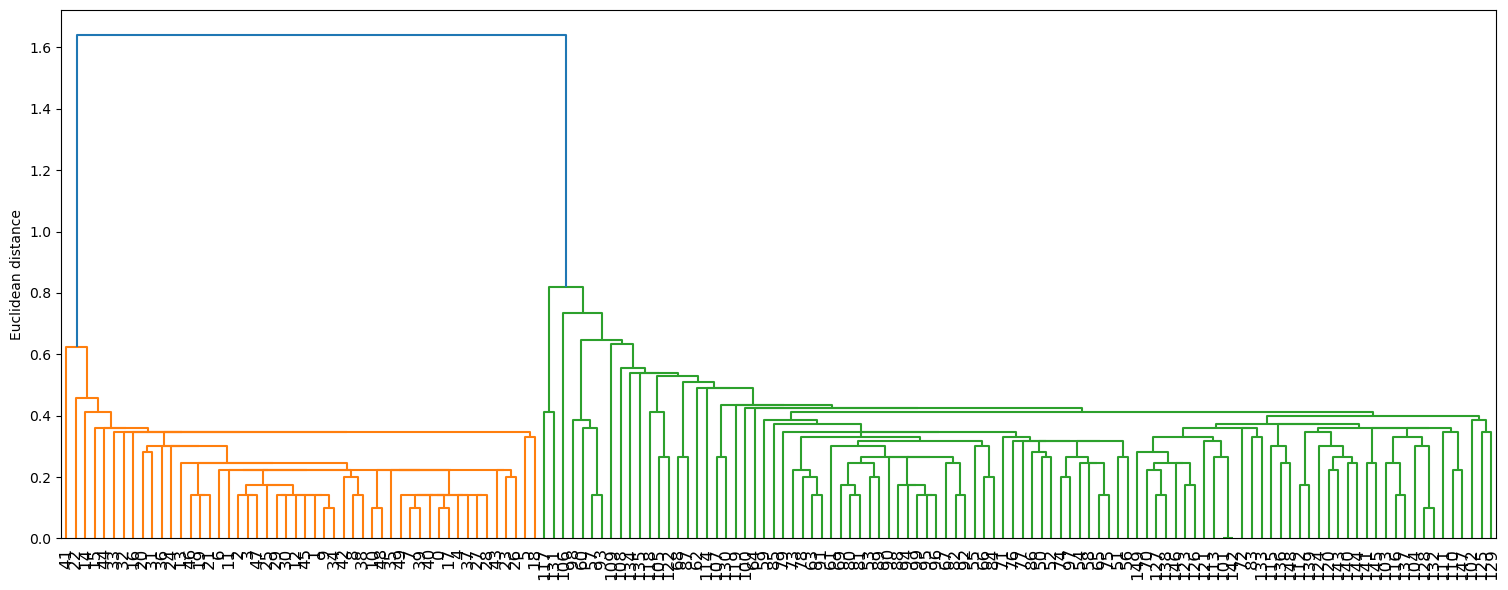

In [135]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6)) # 그림 크기 조절
dendrogram(clusters, leaf_rotation=90, leaf_font_size=12)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

In [136]:
from scipy.cluster.hierarchy import fcluster
cut_tree = fcluster(clusters, t=1, criterion='distance')
cut_tree

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [137]:
from scipy.cluster.hierarchy import linkage
clusters = linkage(y=X, method='complete', metric='euclidean') # complete
clusters

array([[1.01000000e+02, 1.42000000e+02, 0.00000000e+00, 2.00000000e+00],
       [7.00000000e+00, 3.90000000e+01, 1.00000000e-01, 2.00000000e+00],
       [0.00000000e+00, 1.70000000e+01, 1.00000000e-01, 2.00000000e+00],
       [9.00000000e+00, 3.40000000e+01, 1.00000000e-01, 2.00000000e+00],
       [1.28000000e+02, 1.32000000e+02, 1.00000000e-01, 2.00000000e+00],
       [1.00000000e+01, 4.80000000e+01, 1.00000000e-01, 2.00000000e+00],
       [4.00000000e+00, 3.70000000e+01, 1.41421356e-01, 2.00000000e+00],
       [1.90000000e+01, 2.10000000e+01, 1.41421356e-01, 2.00000000e+00],
       [2.90000000e+01, 3.00000000e+01, 1.41421356e-01, 2.00000000e+00],
       [5.70000000e+01, 9.30000000e+01, 1.41421356e-01, 2.00000000e+00],
       [8.00000000e+01, 8.10000000e+01, 1.41421356e-01, 2.00000000e+00],
       [1.16000000e+02, 1.37000000e+02, 1.41421356e-01, 2.00000000e+00],
       [8.00000000e+00, 3.80000000e+01, 1.41421356e-01, 2.00000000e+00],
       [3.00000000e+00, 4.70000000e+01, 1.41421356e

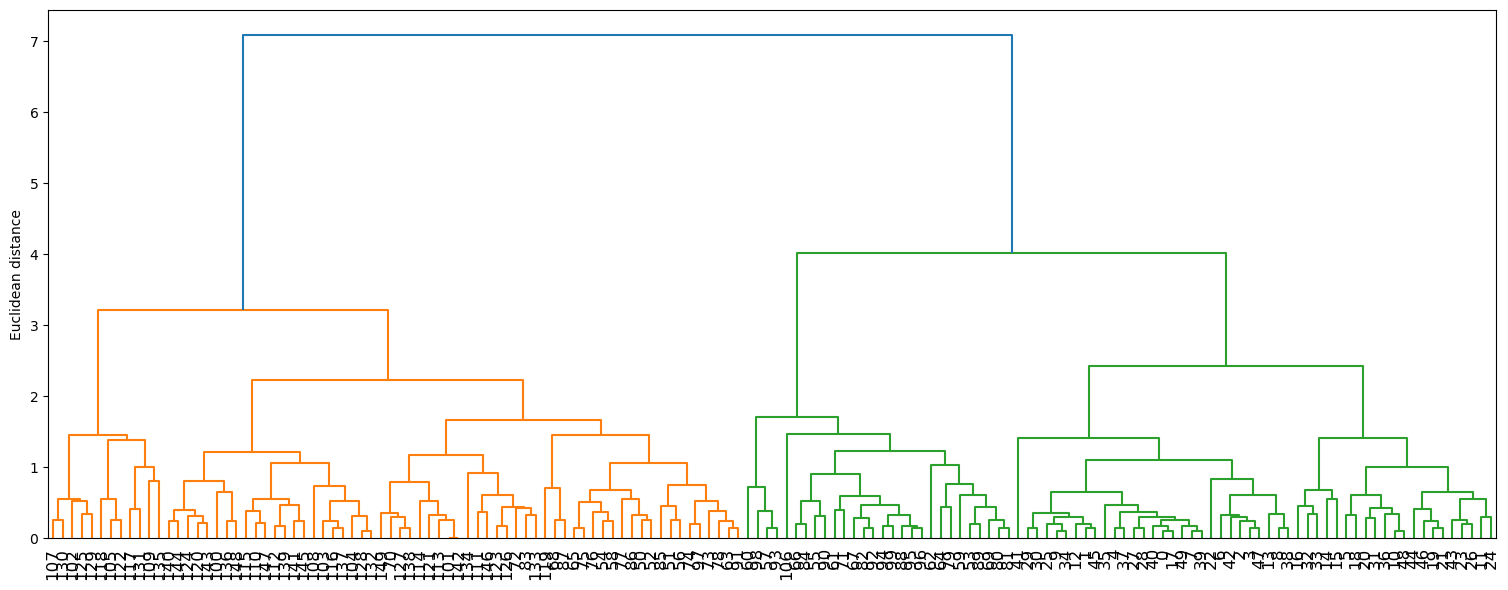

In [138]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6)) # 그림 크기 조절
dendrogram(clusters, leaf_rotation=90, leaf_font_size=12)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

In [139]:
from scipy.cluster.hierarchy import fcluster
cut_tree = fcluster(clusters, t=4, criterion='distance')
cut_tree

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1,
       2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [140]:
from scipy.cluster.hierarchy import linkage
clusters = linkage(y=X, method='average', metric='euclidean') # average
clusters

array([[1.01000000e+02, 1.42000000e+02, 0.00000000e+00, 2.00000000e+00],
       [7.00000000e+00, 3.90000000e+01, 1.00000000e-01, 2.00000000e+00],
       [0.00000000e+00, 1.70000000e+01, 1.00000000e-01, 2.00000000e+00],
       [9.00000000e+00, 3.40000000e+01, 1.00000000e-01, 2.00000000e+00],
       [1.28000000e+02, 1.32000000e+02, 1.00000000e-01, 2.00000000e+00],
       [1.00000000e+01, 4.80000000e+01, 1.00000000e-01, 2.00000000e+00],
       [4.00000000e+00, 3.70000000e+01, 1.41421356e-01, 2.00000000e+00],
       [1.90000000e+01, 2.10000000e+01, 1.41421356e-01, 2.00000000e+00],
       [2.90000000e+01, 3.00000000e+01, 1.41421356e-01, 2.00000000e+00],
       [5.70000000e+01, 9.30000000e+01, 1.41421356e-01, 2.00000000e+00],
       [8.00000000e+01, 8.10000000e+01, 1.41421356e-01, 2.00000000e+00],
       [1.16000000e+02, 1.37000000e+02, 1.41421356e-01, 2.00000000e+00],
       [8.00000000e+00, 3.80000000e+01, 1.41421356e-01, 2.00000000e+00],
       [3.00000000e+00, 4.70000000e+01, 1.41421356e

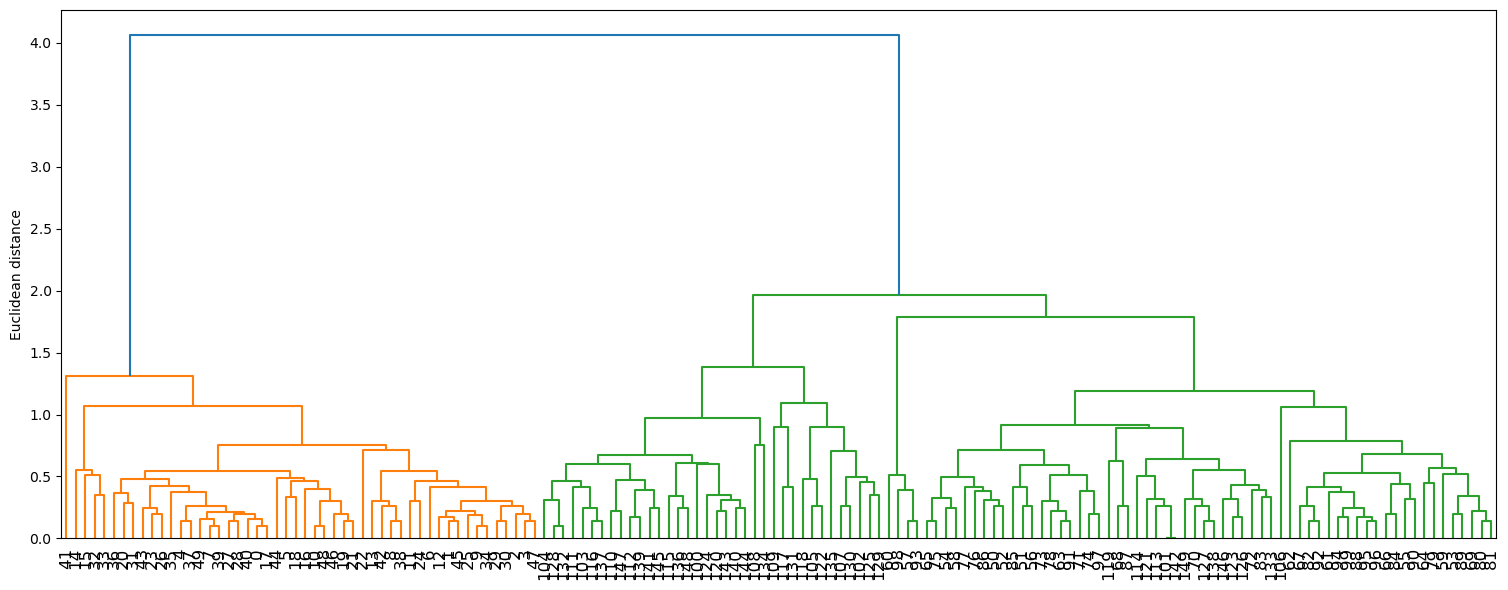

In [141]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6)) # 그림 크기 조절
dendrogram(clusters, leaf_rotation=90, leaf_font_size=12)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

In [142]:
from scipy.cluster.hierarchy import fcluster
cut_tree = fcluster(clusters, t=2, criterion='distance')
cut_tree

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [ ]:
# K-Means
import seaborn as sns
iris = sns.load_dataset('iris')

y = iris['species']
X = iris.drop('species',axis=1)

from sklearn.preprocessing import LabelEncoder
classle = LabelEncoder() 
y = classle.fit_transform(y) # 문자형 범주 변수를 수치화

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

from sklearn.preprocessing import StandardScaler # 자료 표준화는 상황에 따라 취사 선택
sc = StandardScaler() 
sc.fit(X_train) # 표준화 식 완성 => 평균, 표준편차 계산
X_train_std = sc.transform(X_train) # 자료 표준화
X_test_std = sc.transform(X_test)

In [143]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, random_state=0, init='k-means++')
model.fit(X)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [144]:
centers = model.cluster_centers_
centers

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [145]:
pred = model.predict(X)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [169]:
# example
import numpy as np
subway = pd.read_csv('서울지하철.csv', encoding='cp949')
subway

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
0,202209,1호선,동대문,692,10,10195,1888,8595,6719,14334,...,8085,418,1956,21,161,0,4,0,0,20221003
1,202209,1호선,동묘앞,163,2,2756,1026,3560,4309,5923,...,3494,122,1490,1,307,0,1,0,0,20221003
2,202209,1호선,서울역,588,19,8568,8043,12144,45586,40540,...,14330,2730,2584,32,267,0,5,0,0,20221003
3,202209,1호선,시청,50,0,2005,4701,3277,22957,6771,...,2937,359,775,1,14,0,0,0,0,20221003
4,202209,1호선,신설동,341,11,8420,2040,8739,8233,19746,...,8004,368,1909,5,21,0,0,0,0,20221003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,202209,중앙선,원덕,111,15,426,4,690,238,744,...,286,1,76,0,0,0,0,0,0,20221003
611,202209,중앙선,중랑,185,7,6218,541,9442,2046,22556,...,4812,27,411,0,1,0,0,0,0,20221003
612,202209,중앙선,지평,0,0,0,0,4,0,394,...,0,0,0,0,0,0,0,0,0,20221003
613,202209,중앙선,팔당,0,0,278,157,802,924,1757,...,215,1,0,0,0,0,0,0,0,20221003


In [170]:
subway.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 52 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   사용월           615 non-null    int64 
 1   호선명           615 non-null    object
 2   지하철역          615 non-null    object
 3   04시-05시 승차인원  615 non-null    int64 
 4   04시-05시 하차인원  615 non-null    int64 
 5   05시-06시 승차인원  615 non-null    int64 
 6   05시-06시 하차인원  615 non-null    int64 
 7   06시-07시 승차인원  615 non-null    int64 
 8   06시-07시 하차인원  615 non-null    int64 
 9   07시-08시 승차인원  615 non-null    int64 
 10  07시-08시 하차인원  615 non-null    int64 
 11  08시-09시 승차인원  615 non-null    int64 
 12  08시-09시 하차인원  615 non-null    int64 
 13  09시-10시 승차인원  615 non-null    int64 
 14  09시-10시 하차인원  615 non-null    int64 
 15  10시-11시 승차인원  615 non-null    int64 
 16  10시-11시 하차인원  615 non-null    int64 
 17  11시-12시 승차인원  615 non-null    int64 
 18  11시-12시 하차인원  615 non-null    int64 
 19  12시-13시 

In [171]:
subway[['04시-05시 승차인원','05시-06시 승차인원']].sum(axis=1)

0      10887
1       2919
2       9156
3       2055
4       8761
       ...  
610      537
611     6403
612        0
613      278
614    13088
Length: 615, dtype: int64

In [185]:
subway.iloc[:,[3,5]].sum(axis=1)

0      10887
1       2919
2       9156
3       2055
4       8761
       ...  
610      537
611     6403
612        0
613      278
614    13088
Length: 615, dtype: int64

In [172]:
subway['출근승차'] = subway['04시-05시 승차인원'] + subway['05시-06시 승차인원']
subway['출근하차'] = subway['04시-05시 하차인원'] + subway['05시-06시 하차인원']
subway['퇴근승차'] = subway['18시-19시 승차인원'] + subway['19시-20시 승차인원']
subway['퇴근하차'] = subway['18시-19시 하차인원'] + subway['19시-20시 하차인원']

In [173]:
subway

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자,출근승차,출근하차,퇴근승차,퇴근하차
0,202209,1호선,동대문,692,10,10195,1888,8595,6719,14334,...,161,0,4,0,0,20221003,10887,1898,40425,38880
1,202209,1호선,동묘앞,163,2,2756,1026,3560,4309,5923,...,307,0,1,0,0,20221003,2919,1028,31096,17255
2,202209,1호선,서울역,588,19,8568,8043,12144,45586,40540,...,267,0,5,0,0,20221003,9156,8062,292299,148036
3,202209,1호선,시청,50,0,2005,4701,3277,22957,6771,...,14,0,0,0,0,20221003,2055,4701,200819,33841
4,202209,1호선,신설동,341,11,8420,2040,8739,8233,19746,...,21,0,0,0,0,20221003,8761,2051,68657,46376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,202209,중앙선,원덕,111,15,426,4,690,238,744,...,0,0,0,0,0,20221003,537,19,1102,1535
611,202209,중앙선,중랑,185,7,6218,541,9442,2046,22556,...,1,0,0,0,0,20221003,6403,548,12731,37486
612,202209,중앙선,지평,0,0,0,0,4,0,394,...,0,0,0,0,0,20221003,0,0,244,387
613,202209,중앙선,팔당,0,0,278,157,802,924,1757,...,0,0,0,0,0,20221003,278,157,5302,3214


In [174]:
data = subway[['출근승차','출근하차','퇴근승차','퇴근하차']]

In [175]:
data

,출근승차,출근하차,퇴근승차,퇴근하차
0,10887,1898,40425,38880
1,2919,1028,31096,17255
2,9156,8062,292299,148036
3,2055,4701,200819,33841
4,8761,2051,68657,46376
...,...,...,...,...
610,537,19,1102,1535
611,6403,548,12731,37486
612,0,0,244,387
613,278,157,5302,3214


In [176]:
from scipy.cluster.hierarchy import linkage
clusters = linkage(y=data, method='complete', metric='euclidean') # complete
clusters

array([[2.02000000e+02, 2.37000000e+02, 0.00000000e+00, 2.00000000e+00],
       [4.00000000e+02, 6.15000000e+02, 0.00000000e+00, 3.00000000e+00],
       [5.00000000e+02, 6.16000000e+02, 0.00000000e+00, 4.00000000e+00],
       ...,
       [1.22200000e+03, 1.22400000e+03, 3.74134734e+05, 2.90000000e+01],
       [1.22100000e+03, 1.22500000e+03, 4.28864129e+05, 5.86000000e+02],
       [1.22600000e+03, 1.22700000e+03, 5.59162818e+05, 6.15000000e+02]])

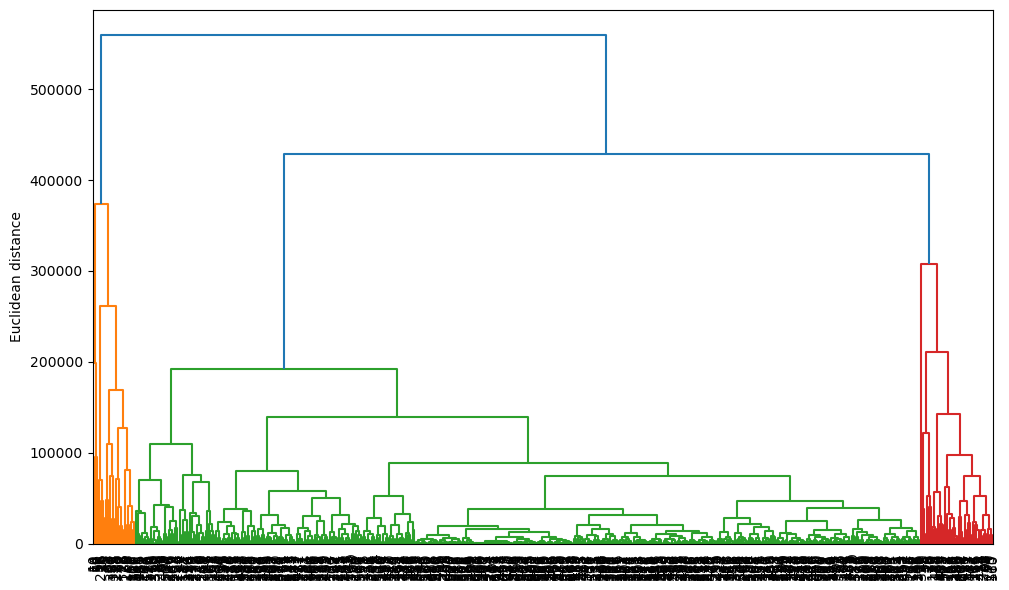

In [177]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6)) # 그림 크기 조절
dendrogram(clusters, leaf_rotation=90, leaf_font_size=10)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

In [178]:
from scipy.cluster.hierarchy import fcluster
cut_tree = fcluster(clusters, t=400000, criterion='distance')
cut_tree

array([2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 3, 3, 1, 1, 3, 3, 3, 3, 2, 2, 2,
       2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 1, 2, 2, 3, 3, 3, 2, 2, 3, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 3, 2, 2, 2, 3, 1, 2, 2, 2, 1, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 3, 3,
       2, 2, 3, 2, 3, 3, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2,
       2, 3, 3, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1,

In [182]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, random_state=0, init='k-means++')
model.fit(data)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [183]:
centers = model.cluster_centers_
centers

array([[  8775.83529412,   1893.82941176,  74498.27058824,
         96850.38823529],
       [  9681.81081081,   3968.35135135, 251283.75675676,
        156436.72972973],
       [  3015.90686275,    728.87745098,  20759.77205882,
         28737.44852941]])

In [184]:
pred = model.predict(data)
pred

array([2, 2, 1, 1, 0, 2, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 2, 0, 0, 1, 1, 2, 2, 1, 2, 2, 1,
       0, 0, 2, 2, 0, 2, 1, 0, 1, 2, 0, 0, 2, 2, 1, 1, 2, 0, 2, 1, 2, 0,
       2, 1, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 1, 0, 1, 0, 1, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 1, 0, 1, 0, 0, 2, 2, 2, 2, 2, 0, 0, 1, 0, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 0,
       2, 2, 0, 1, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 1, 0, 0, 0, 0,
       0, 0, 2, 2, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 2, 2, 2, 0, 2, 0, 0,
       0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 0, 1, 2, 2, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 2,
       2, 0, 0, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 1,